In [47]:
import seaborn as sns
import torch
from matplotlib import pyplot as plt

plt.rcParams['font.family'] = 'Times New Roman'

In [54]:
task_specific_scores = torch.load("../results/expert_task_specific_score.pt")
wanda_dict = torch.load("../results/expert_wanda_score.pt")
wanda_scores = torch.zeros_like(task_specific_scores)
for layer in range(32):
    for expert in range(8):
        wanda_scores[layer][expert] = wanda_dict[f"model.layers.{layer}.block_sparse_moe.experts.{expert}"]
massive_routing = torch.load("../results/mass-routing-count-top2-5000.pt")
frequency = torch.load("../results/routing-count.pt")

# normalize to [0, 1]
task_specific_scores = (task_specific_scores - task_specific_scores.min()) / (
            task_specific_scores.max() - task_specific_scores.min())
wanda_scores = (wanda_scores - wanda_scores.min()) / (wanda_scores.max() - wanda_scores.min())
massive_routing = (massive_routing - massive_routing.min()) / (massive_routing.max() - massive_routing.min())
frequency = frequency / frequency.sum(-1, True)

In [71]:
frequency_top_experts = []
for i, flat_idx in enumerate(frequency.flatten().sort(descending=True)[1]):
    frequency_top_experts.append(f"exp_l{flat_idx // 8}e{flat_idx % 8}")
"_8.".join(frequency_top_experts[:84])

'exp_l0e5_8.exp_l12e1_8.exp_l14e4_8.exp_l24e2_8.exp_l6e5_8.exp_l23e1_8.exp_l2e0_8.exp_l8e5_8.exp_l11e1_8.exp_l8e0_8.exp_l1e4_8.exp_l10e1_8.exp_l12e2_8.exp_l14e5_8.exp_l20e6_8.exp_l4e3_8.exp_l17e2_8.exp_l11e4_8.exp_l12e0_8.exp_l16e7_8.exp_l1e3_8.exp_l31e7_8.exp_l29e2_8.exp_l9e0_8.exp_l11e2_8.exp_l10e2_8.exp_l5e1_8.exp_l14e3_8.exp_l7e5_8.exp_l23e0_8.exp_l15e1_8.exp_l10e0_8.exp_l22e0_8.exp_l13e7_8.exp_l2e1_8.exp_l31e3_8.exp_l28e1_8.exp_l4e2_8.exp_l10e3_8.exp_l23e6_8.exp_l15e2_8.exp_l17e5_8.exp_l21e6_8.exp_l19e0_8.exp_l30e7_8.exp_l30e4_8.exp_l28e3_8.exp_l9e3_8.exp_l3e2_8.exp_l12e3_8.exp_l15e0_8.exp_l15e7_8.exp_l16e6_8.exp_l7e6_8.exp_l25e1_8.exp_l11e0_8.exp_l18e0_8.exp_l12e5_8.exp_l17e7_8.exp_l22e3_8.exp_l30e2_8.exp_l0e2_8.exp_l27e5_8.exp_l19e4_8.exp_l11e5_8.exp_l5e2_8.exp_l26e3_8.exp_l25e5_8.exp_l17e1_8.exp_l25e4_8.exp_l3e5_8.exp_l14e1_8.exp_l24e1_8.exp_l21e3_8.exp_l26e2_8.exp_l4e7_8.exp_l9e6_8.exp_l9e5_8.exp_l6e0_8.exp_l21e0_8.exp_l31e2_8.exp_l6e7_8.exp_l10e7_8.exp_l0e7'

In [58]:
mass_top_experts = []
for flat_idx in massive_routing.flatten().sort(descending=True)[1]:
    mass_top_experts.append(f"exp_l{flat_idx // 8}e{flat_idx % 8}")
"_8.".join(mass_top_experts[:10])

'exp_l19e6_8.exp_l23e3_8.exp_l27e4_8.exp_l23e1_8.exp_l15e3_8.exp_l15e7_8.exp_l16e0_8.exp_l11e5_8.exp_l9e7_8.exp_l6e4'

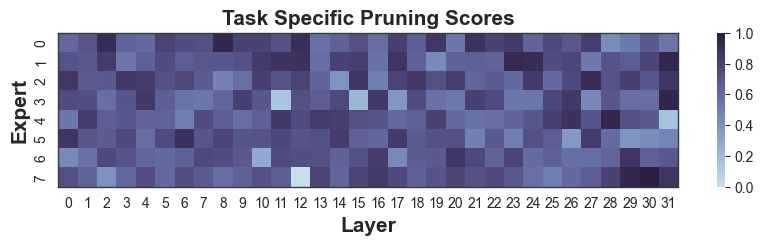

In [25]:
fontsize = 15
plt.figure(figsize=(10, 2))
ax = sns.heatmap(
    task_specific_scores.transpose(0, 1),
    cmap=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True),
    linewidth=0,
)

# set the colorbar labels to only one decimal place
title = f"Task Specific Pruning Scores"
ax.set_title(title, fontsize=fontsize, fontweight="bold")

ax.set_ylabel("Expert", fontsize=fontsize, fontweight="bold")
ax.set_xlabel("Layer", fontsize=fontsize, fontweight="bold")

# set legend to percentage
cbar = ax.collections[0].colorbar

for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)
    spine.set_edgecolor("#343a40")

plt.show()

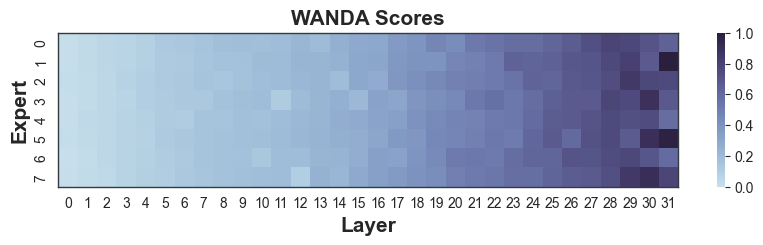

In [26]:
fontsize = 15
plt.figure(figsize=(10, 2))
ax = sns.heatmap(
    wanda_scores.transpose(0, 1),
    cmap=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True),
    linewidth=0,
)

# set the colorbar labels to only one decimal place
title = f"WANDA Scores"
ax.set_title(title, fontsize=fontsize, fontweight="bold")

ax.set_ylabel("Expert", fontsize=fontsize, fontweight="bold")
ax.set_xlabel("Layer", fontsize=fontsize, fontweight="bold")

# set legend to percentage
cbar = ax.collections[0].colorbar

for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)
    spine.set_edgecolor("#343a40")

plt.show()

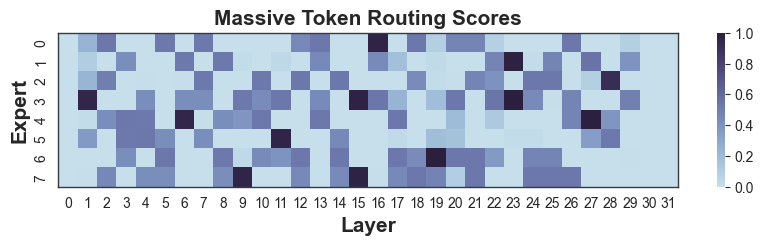

In [27]:
fontsize = 15
plt.figure(figsize=(10, 2))
ax = sns.heatmap(
    massive_routing.transpose(0, 1),
    cmap=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True),
    linewidth=0,
)

# set the colorbar labels to only one decimal place
title = f"Massive Token Routing Scores"
ax.set_title(title, fontsize=fontsize, fontweight="bold")

ax.set_ylabel("Expert", fontsize=fontsize, fontweight="bold")
ax.set_xlabel("Layer", fontsize=fontsize, fontweight="bold")

# set legend to percentage
cbar = ax.collections[0].colorbar

for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)
    spine.set_edgecolor("#343a40")

plt.show()